# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .. 

Obtaining file:///Users/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pywebtask (pyproject.toml) ... done
  Created wheel for pywebtask: filename=pywebtask-0.8.11-0.editable-py3-none-any.whl size=4605 sha256=86b169250caedfb0b90350f1bf400da1aca5f156e4e70bc0981da8116da17930
  Stored in directory: /private/var/folders/gf/f2gq1g_97yl5m14bd6t4chm80000gp/T/pip-ephem-wheel-cache-czqdqak1/wheels/7b/f0/6f/e5a0e81d9f5259d8dd15015bc30fcbb2ed08e174606e4fc43b
Successfully built pywebtask
  Attempting uninstall: pywebtask
    Found existing installation: pywebtask 0.8.11
    Uninstalling pywebtask-0.8.11:
      Successfully uninstalled pywebtask-0.8.11

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.openai import OpenAILLM

wt = Webtask()
# OpenAILLM will automatically read OPENAI_API_KEY from environment
llm = OpenAILLM.create(model="gpt-4.1")

/Users/stevewang/Github/web-auto/webtask/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with 2 second delay between actions to allow pages to load
agent = await wt.create_agent(llm=llm, action_delay=3.0)

## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


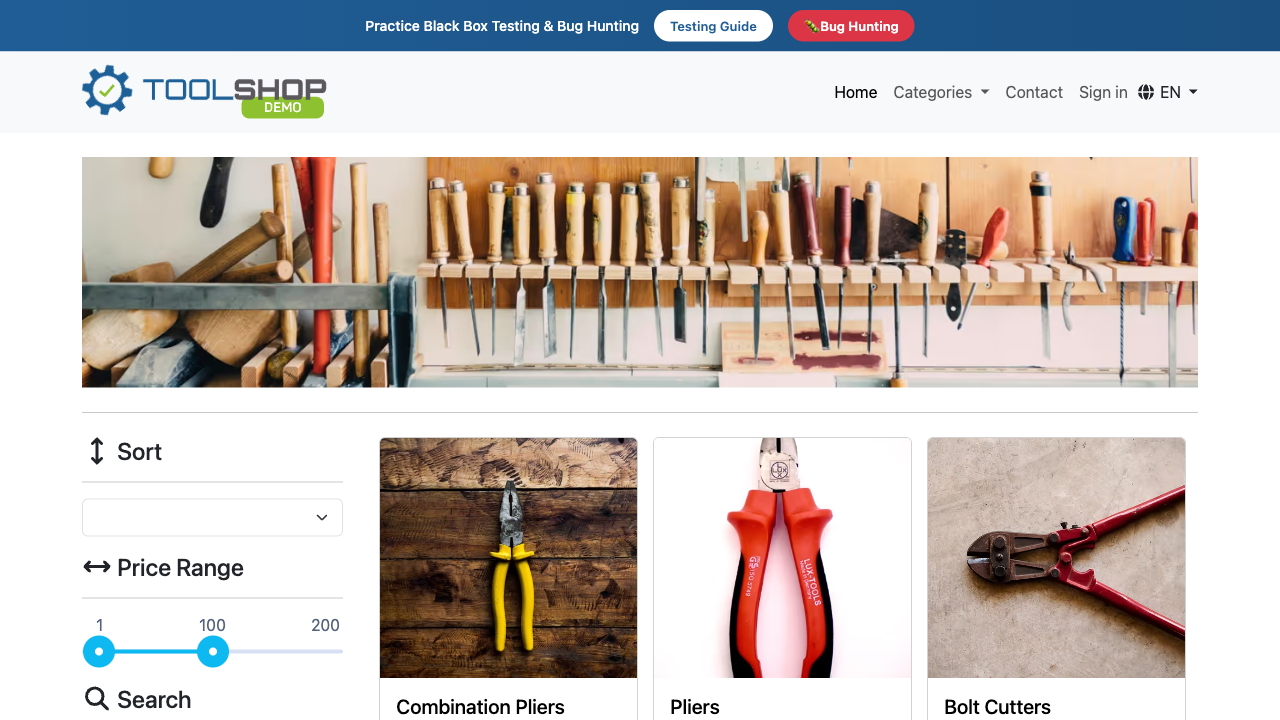

In [5]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent to add items to the shopping cart.

In [ ]:
# Execute the task step by step
agent.set_task("add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to checkout page")

max_steps = 10
for i in range(max_steps):
    print(f"\n=== Executing Step {i+1} ===")
    step = await agent.run_step()

    print(f"Status: {'Complete' if step.is_complete else 'Incomplete'}")
    print(f"Message: {step.result.message}")
    
    # Show actions (unified schema - all modes return actions)
    if step.result.actions:
        print(f"Actions: {len(step.result.actions)}")
        for j, action in enumerate(step.result.actions, 1):
            print(f"  Action {j}: {action.tool} - {action.reason}")
    else:
        print("Actions: None")

    if step.is_complete:
        print(f"\n✓ Task completed in {i+1} steps!")
        break
else:
    print(f"\n✗ Task not completed after {max_steps} steps")

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


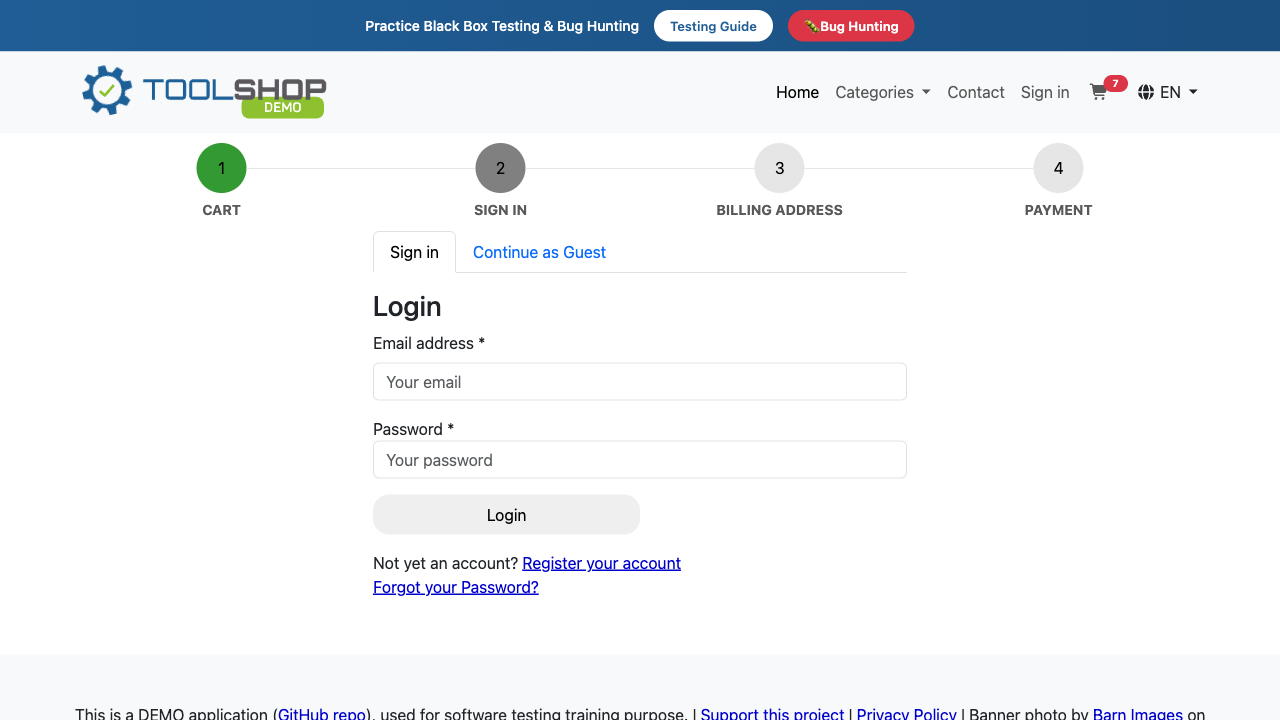

In [7]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))